# Practice Problem - Monte-Carlo Error Propagation

## Part 1

You have likely encountered the concept of propagation of uncertainty before (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.01~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in your script (you can just derive the equation by hand and implement it in a single line in your code).

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

In [1]:
# Your solution here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x,mu,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-(x-mu)**2/(2*sig**2))

def force(m1,m2,r):
    g = 6.67384e-11
    f = g*m1*m2/r**2.
    return f

m1 = 40.e4
m1e = 0.05e4
m2 = 30.e4
m2e = 0.1e4
r = 3.2
re = 0.01

f = force(m1,m2,r)
fe = f*np.sqrt((m1e/m1)**2.+(m2e/m2)**2.+4.*(re/r)**2.)
print(f,fe)

0.7820906249999999 0.00562540727264


0.782109220314 0.00562210198603


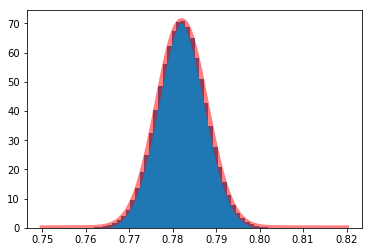

In [2]:
nmc = 1000000
m1mc = np.random.normal(m1,m1e,nmc)
m2mc = np.random.normal(m2,m2e,nmc)
rmc = np.random.normal(r,re,nmc)
fmc = force(m1mc,m2mc,rmc)
print(np.mean(fmc),np.std(fmc))

h = plt.hist(fmc, bins=50, normed=True)
x = np.linspace(0.75,0.82,1000)
plt.plot(x,gaussian(x,f,fe),'r',linewidth=5, alpha=0.5)

## Part 2

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm2\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm10\times10^4\rm{kg}$$
$$r=3.2\pm1.0~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

## Solution

In [3]:

# your solution here
m1 = 40.e4
m1e = 2.e4
m2 = 30.e4
m2e = 10.e4
r = 3.2
re = 1.

f = force(m1,m2,r)
fe = f*np.sqrt((m1e/m1)**2.+(m2e/m2)**2.+4.*(re/r)**2.)
print(f,fe)

0.7820906249999999 0.555359304341


-1.61009960563 1737835.88494


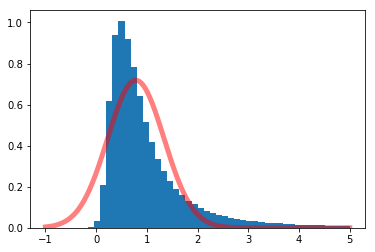

In [4]:
nmc = 1000000
m1mc = np.random.normal(m1,m1e,nmc)
m2mc = np.random.normal(m2,m2e,nmc)
rmc = np.random.normal(r,re,nmc)
fmc = force(m1mc,m2mc,rmc)
print(np.min(rmc),np.std(fmc))

h = plt.hist(fmc, bins=50, range=[-1,5], normed=True)
x = np.linspace(-1,5,1000)
plt.plot(x,gaussian(x,f,fe),'r',linewidth=5, alpha=0.5)

This example shows that the MC error propagation gives the correct probability distribution function (PDF) of the force, even if the analytical error propagation is technically correct in providing the standard deviation. The point is that the PDF is non-Gaussian. This happens because the uncertainties on the input numbers are large relative to the numbers. For instance, the uncertainty on the distance between both masses is about 30% of the distance. This means that a zero distance is about 3$\sigma$ away, and that in 1000000 MC experiments, some distances will be drawn that are $\leq0$. As a result, the error propagation contains a singularity, leading to extremely high forces. On the other hand, the force cannot be smaller than zero, unless an (unphysical) negative mass is drawn. This is possible for $M_2$, which also has a large uncertainty, and explains why the above histogram shows some MC experiments with a negative force.